In [1]:
# Import the dependencies.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.

coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.

for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-73.28221336295798 155.5630436733182
42.02078980282215 145.08225303083458
-88.58886483136274 120.0747095870484
4.256407769870648 -127.70167069442238
34.00029654233984 56.53497699674577
-66.70986806660133 -169.97287215367504
19.09331376049377 -177.6460290006745
64.16840866303744 100.69733254446453
-0.3439915680937844 129.77803946293466
40.99070855201464 174.6059708860737
87.7848133088508 105.10495058077595
-83.15225013842786 -9.106365503894324
88.14593323639727 31.785816926904772
-43.04257563133586 172.184022568697
-18.089331046567693 -179.50423152696163
-28.035316242055572 26.253715036583344
-38.97802813915438 -54.983522452092956
52.3383311300868 -130.48793151953998
27.91640919155114 21.965802824161273
-44.64488755383071 -151.21332615084515
-74.71167838249764 54.64757272593272
-38.81071700435039 143.45576049760388
41.504507915049686 91.38267817269752
17.899780214653262 109.12044601575747
38.26553941933872 158.5100696076974
0.23733172812468695 -15.63499877102899
-47.57504501458788 -124.

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.

cities = []

# Identify the nearest city for each latitude and longitude combination.

for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    # If the city is unique, then we will add it to the cities list.
    
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.

len(cities)

642

In [7]:
# Import the time library and the datetime module from the datetime library 

import time
from datetime import datetime

In [8]:
# Import the requests library.

import requests

# Import the API key.

from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b61e5efacc42e3559cf36db1e366e2cd


In [10]:
# Create an empty list to hold the weather data.

city_data = []

# Print the beginning of the logging.

print("Beginning Data Retrieval     ")

print("-----------------------------")

# Create counters.

record_count = 1
set_count = 1

# Loop through all the cities in the list.

for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    
    record_count += 1
    
    # Run an API request for each of the cities.
    
    try:
        # Parse the JSON and retrieve data.
        
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.

    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.

print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bluff
Processing Record 2 of Set 1 | kushiro
Processing Record 3 of Set 1 | new norfolk
Processing Record 4 of Set 1 | atuona
Processing Record 5 of Set 1 | tabas
Processing Record 6 of Set 1 | vaini
Processing Record 7 of Set 1 | kapaa
Processing Record 8 of Set 1 | tura
Processing Record 9 of Set 1 | sorong
Processing Record 10 of Set 1 | nikolskoye
Processing Record 11 of Set 1 | khatanga
Processing Record 12 of Set 1 | hermanus
Processing Record 13 of Set 1 | berlevag
Processing Record 14 of Set 1 | oxford
Processing Record 15 of Set 1 | wesselsbron
Processing Record 16 of Set 1 | mar del plata
Processing Record 17 of Set 1 | prince rupert
Processing Record 18 of Set 1 | jalu
Processing Record 19 of Set 1 | mataura
Processing Record 20 of Set 1 | east london
Processing Record 21 of Set 1 | colac
Processing Record 22 of Set 1 | hami
Processing Record 23 of Set 1 | wanning
Processing Record 24 

Processing Record 39 of Set 4 | tuatapere
Processing Record 40 of Set 4 | samarai
Processing Record 41 of Set 4 | beringovskiy
Processing Record 42 of Set 4 | upernavik
Processing Record 43 of Set 4 | rwamagana
Processing Record 44 of Set 4 | constitucion
Processing Record 45 of Set 4 | gustavo diaz ordaz
Processing Record 46 of Set 4 | aflu
City not found. Skipping...
Processing Record 47 of Set 4 | sarakhs
Processing Record 48 of Set 4 | dunedin
Processing Record 49 of Set 4 | palabuhanratu
City not found. Skipping...
Processing Record 50 of Set 4 | pitkyaranta
Processing Record 1 of Set 5 | vigrestad
Processing Record 2 of Set 5 | mindelo
Processing Record 3 of Set 5 | flinders
Processing Record 4 of Set 5 | sidi ali
Processing Record 5 of Set 5 | cockburn town
Processing Record 6 of Set 5 | saskylakh
Processing Record 7 of Set 5 | pinawa
Processing Record 8 of Set 5 | ploemeur
Processing Record 9 of Set 5 | shunyi
Processing Record 10 of Set 5 | faanui
Processing Record 11 of Set 5

Processing Record 30 of Set 8 | mora
Processing Record 31 of Set 8 | wakkanai
Processing Record 32 of Set 8 | vabalninkas
Processing Record 33 of Set 8 | lompoc
Processing Record 34 of Set 8 | seydisehir
Processing Record 35 of Set 8 | turbat
Processing Record 36 of Set 8 | meulaboh
Processing Record 37 of Set 8 | leczyca
Processing Record 38 of Set 8 | itarema
Processing Record 39 of Set 8 | belaya gora
Processing Record 40 of Set 8 | port hedland
Processing Record 41 of Set 8 | salinopolis
Processing Record 42 of Set 8 | otaru
Processing Record 43 of Set 8 | nanortalik
Processing Record 44 of Set 8 | vila velha
Processing Record 45 of Set 8 | dwarka
Processing Record 46 of Set 8 | arenapolis
Processing Record 47 of Set 8 | porto velho
Processing Record 48 of Set 8 | saint george
Processing Record 49 of Set 8 | puerto colombia
Processing Record 50 of Set 8 | vostok
Processing Record 1 of Set 9 | aleppo
Processing Record 2 of Set 9 | guaymas
Processing Record 3 of Set 9 | malwan
City n

Processing Record 15 of Set 12 | surt
Processing Record 16 of Set 12 | price
Processing Record 17 of Set 12 | statesboro
Processing Record 18 of Set 12 | pringsewu
Processing Record 19 of Set 12 | nouadhibou
Processing Record 20 of Set 12 | balancan
Processing Record 21 of Set 12 | barpali
Processing Record 22 of Set 12 | port blair
Processing Record 23 of Set 12 | the valley
Processing Record 24 of Set 12 | mpulungu
Processing Record 25 of Set 12 | ucluelet
Processing Record 26 of Set 12 | yanam
Processing Record 27 of Set 12 | harrisonburg
Processing Record 28 of Set 12 | hofn
Processing Record 29 of Set 12 | southbridge
Processing Record 30 of Set 12 | bull savanna
Processing Record 31 of Set 12 | wamba
Processing Record 32 of Set 12 | la asuncion
Processing Record 33 of Set 12 | sao jose da coroa grande
Processing Record 34 of Set 12 | lephepe
City not found. Skipping...
Processing Record 35 of Set 12 | puro
Processing Record 36 of Set 12 | takhli
Processing Record 37 of Set 12 | l

In [11]:
len(city_data)

589

In [55]:
city_weather

{'coord': {'lon': -71.6273, 'lat': -33.0393},
 'weather': [{'id': 741, 'main': 'Fog', 'description': 'fog', 'icon': '50d'}],
 'base': 'stations',
 'main': {'temp': 52.59,
  'feels_like': 51.78,
  'temp_min': 49.64,
  'temp_max': 57.99,
  'pressure': 1021,
  'humidity': 90},
 'visibility': 4500,
 'wind': {'speed': 1.14, 'deg': 120},
 'clouds': {'all': 75},
 'dt': 1661521807,
 'sys': {'type': 2,
  'id': 2034956,
  'country': 'CL',
  'sunrise': 1661512308,
  'sunset': 1661552716},
 'timezone': -14400,
 'id': 3868626,
 'name': 'Valparaíso',
 'cod': 200}

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.

city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bluff,-46.6000,168.3333,46.80,83,14,4.70,NZ,2022-08-26 13:35:19
1,Kushiro,42.9750,144.3747,63.09,97,100,4.05,JP,2022-08-26 13:35:19
2,New Norfolk,-42.7826,147.0587,44.91,87,11,0.43,AU,2022-08-26 13:35:19
3,Atuona,-9.8000,-139.0333,76.14,71,47,20.20,PF,2022-08-26 13:35:20
4,Tabas,33.5959,56.9244,88.47,8,0,13.73,IR,2022-08-26 13:35:20
5,Vaini,-21.2000,-175.2000,73.56,94,20,4.61,TO,2022-08-26 13:35:20
6,Kapaa,22.0752,-159.3190,74.19,89,27,1.01,US,2022-08-26 13:35:21
7,Tura,25.5198,90.2201,77.72,86,99,3.02,IN,2022-08-26 13:35:21
8,Sorong,-0.8833,131.2500,78.76,83,90,5.53,ID,2022-08-26 13:35:21
9,Nikolskoye,59.7035,30.7861,67.87,55,76,5.17,RU,2022-08-26 13:35:21


In [13]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bluff,NZ,2022-08-26 13:35:19,-46.6000,168.3333,46.80,83,14,4.70
1,Kushiro,JP,2022-08-26 13:35:19,42.9750,144.3747,63.09,97,100,4.05
2,New Norfolk,AU,2022-08-26 13:35:19,-42.7826,147.0587,44.91,87,11,0.43
3,Atuona,PF,2022-08-26 13:35:20,-9.8000,-139.0333,76.14,71,47,20.20
4,Tabas,IR,2022-08-26 13:35:20,33.5959,56.9244,88.47,8,0,13.73
5,Vaini,TO,2022-08-26 13:35:20,-21.2000,-175.2000,73.56,94,20,4.61
6,Kapaa,US,2022-08-26 13:35:21,22.0752,-159.3190,74.19,89,27,1.01
7,Tura,IN,2022-08-26 13:35:21,25.5198,90.2201,77.72,86,99,3.02
8,Sorong,ID,2022-08-26 13:35:21,-0.8833,131.2500,78.76,83,90,5.53
9,Nikolskoye,RU,2022-08-26 13:35:21,59.7035,30.7861,67.87,55,76,5.17


In [14]:
# Create the output file (CSV).

output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.

city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.

lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

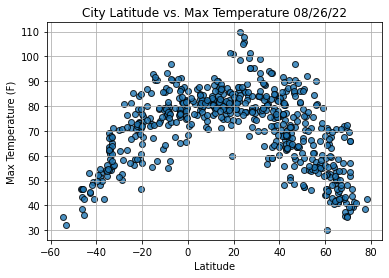

In [16]:
# Import time module

import time

# Build the scatter plot for latitude vs. max temperature.

plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.

plt.savefig("weather_data/Fig1.png")

# Show plot.

plt.show()

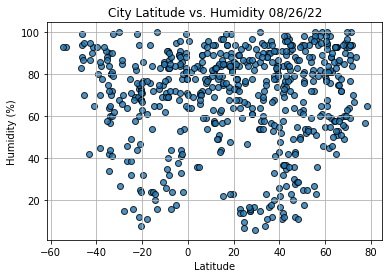

In [17]:
# Build the scatter plots for latitude vs. humidity.

plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.

plt.savefig("weather_data/Fig2.png")

# Show plot.

plt.show()

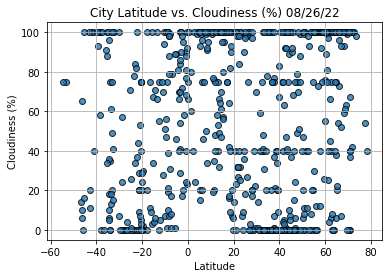

In [18]:
# Build the scatter plots for latitude vs. cloudiness.

plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.

plt.savefig("weather_data/Fig3.png")

# Show plot.

plt.show()

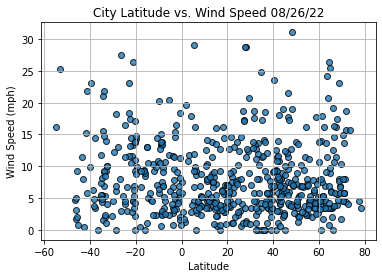

In [19]:
# Build the scatter plots for latitude vs. wind speed.

plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.

plt.savefig("weather_data/Fig4.png")

# Show plot.

plt.show()

In [20]:
index13 = city_data_df.loc[13]
index13

City                       Oxford
Country                        GB
Date          2022-08-26 13:31:00
Lat                       51.7522
Lng                        -1.256
Max Temp                    75.87
Humidity                       52
Cloudiness                     40
Wind Speed                   6.91
Name: 13, dtype: object

In [21]:
city_data_df["Lat"] >= 0

0      False
1       True
2      False
3      False
4       True
       ...  
584     True
585     True
586    False
587     True
588    False
Name: Lat, Length: 589, dtype: bool

In [22]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Kushiro,JP,2022-08-26 13:35:19,42.9750,144.3747,63.09,97,100,4.05
4,Tabas,IR,2022-08-26 13:35:20,33.5959,56.9244,88.47,8,0,13.73
6,Kapaa,US,2022-08-26 13:35:21,22.0752,-159.3190,74.19,89,27,1.01
7,Tura,IN,2022-08-26 13:35:21,25.5198,90.2201,77.72,86,99,3.02
9,Nikolskoye,RU,2022-08-26 13:35:21,59.7035,30.7861,67.87,55,76,5.17


In [23]:
# Create Northern and Southern Hemisphere DataFrames.

northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <= 0)]

In [24]:
# Import linear regression from the SciPy stats module.

from scipy.stats import linregress

In [25]:
# Create an equal number of latitudes and temperatures.

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Perform linear regression.

(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Get the equation of the line.

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_eq)
print(f"The p-value is: {p_value:.3f}")

y = -0.54x + 92.29
The p-value is: 0.000


In [26]:
# Calculate the regression line "y values" from the slope and intercept.

regress_values = [(lat * slope + intercept) for lat in x_values]

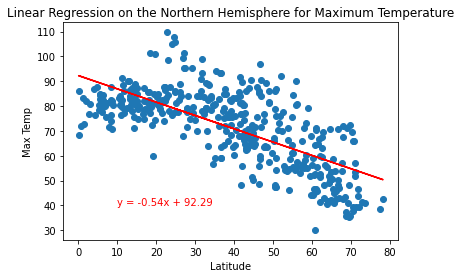

In [27]:
# Create a scatter plot of the x and y values.

plt.scatter(x_values,y_values)

# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.

plt.plot(x_values,regress_values, "r")

# Annotate the text for the line equation and add its coordinates.

plt.annotate(line_eq, (10,40), color="red")
plt.title('Linear Regression on the Northern Hemisphere for Maximum Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

In [28]:
# Create an equal number of latitudes and temperatures.

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Perform linear regression.

(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Get the equation of the line.

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_eq)
print(f"The p-value is: {p_value:.3f}")

y = 0.79x + 85.32
The p-value is: 0.000


In [29]:
# Calculate the regression line "y values" from the slope and intercept.

regress_values = [(lat * slope + intercept) for lat in x_values]

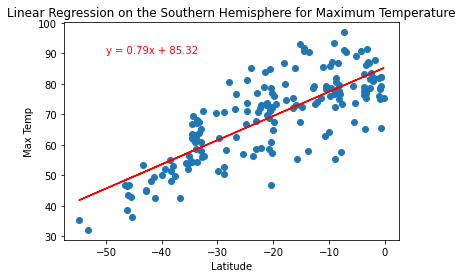

In [30]:
# Create a scatter plot of the x and y values.

plt.scatter(x_values,y_values)

# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.

plt.plot(x_values,regress_values, "r")

# Annotate the text for the line equation and add its coordinates.

plt.annotate(line_eq, (-50,90), color="red")
plt.title('Linear Regression on the Southern Hemisphere for Maximum Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

In [31]:
# Create an equal number of latitudes and temperatures.

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Perform linear regression.

(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Get the equation of the line.

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_eq)
print(f"The p-value is: {p_value:.3f}")

y = 0.04x + 68.1
The p-value is: 0.455


In [32]:
# Calculate the regression line "y values" from the slope and intercept.

regress_values = [(lat * slope + intercept) for lat in x_values]

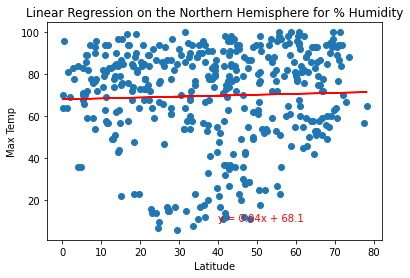

In [33]:
# Create a scatter plot of the x and y values.

plt.scatter(x_values,y_values)

# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.

plt.plot(x_values,regress_values, "r")

# Annotate the text for the line equation and add its coordinates.

plt.annotate(line_eq, (40,10), color="red")
plt.title('Linear Regression on the Northern Hemisphere for % Humidity')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

In [54]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

NameError: name 'plot_linear_regression' is not defined

In [38]:
# Create an equal number of latitudes and temperatures.

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Perform linear regression.

(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Get the equation of the line.

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_eq)
print(f"The p-value is: {p_value:.3f}")

y = -0.23x + 62.72
The p-value is: 0.070


In [39]:
# Calculate the regression line "y values" from the slope and intercept.

regress_values = [(lat * slope + intercept) for lat in x_values]

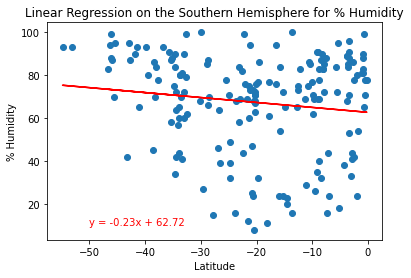

In [41]:
# Create a scatter plot of the x and y values.

plt.scatter(x_values,y_values)

# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.

plt.plot(x_values,regress_values, "r")

# Annotate the text for the line equation and add its coordinates.

plt.annotate(line_eq, (-50,10), color="red")
plt.title('Linear Regression on the Southern Hemisphere for % Humidity')
plt.xlabel('Latitude')
plt.ylabel('% Humidity')
plt.show()

In [42]:
# Create an equal number of latitudes and temperatures.

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Perform linear regression.

(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Get the equation of the line.

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_eq)
print(f"The p-value is: {p_value:.3f}")

y = -0.04x + 58.62
The p-value is: 0.661


In [43]:
# Calculate the regression line "y values" from the slope and intercept.

regress_values = [(lat * slope + intercept) for lat in x_values]

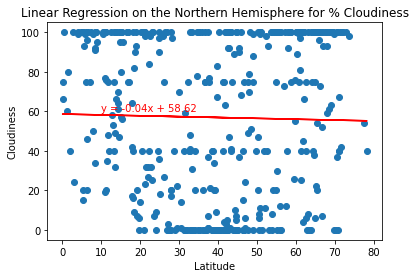

In [44]:
# Create a scatter plot of the x and y values.

plt.scatter(x_values,y_values)

# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.

plt.plot(x_values,regress_values, "r")

# Annotate the text for the line equation and add its coordinates.

plt.annotate(line_eq, (10,60), color="red")
plt.title('Linear Regression on the Northern Hemisphere for % Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

In [45]:
# Create an equal number of latitudes and temperatures.

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Perform linear regression.

(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Get the equation of the line.

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_eq)
print(f"The p-value is: {p_value:.3f}")

y = 0.37x + 55.06
The p-value is: 0.073


In [46]:
# Calculate the regression line "y values" from the slope and intercept.

regress_values = [(lat * slope + intercept) for lat in x_values]

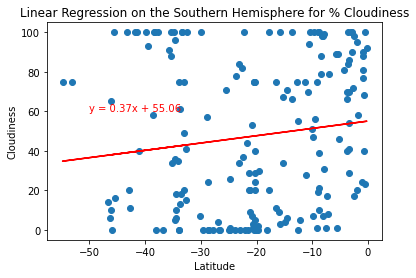

In [47]:
# Create a scatter plot of the x and y values.

plt.scatter(x_values,y_values)

# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.

plt.plot(x_values,regress_values, "r")

# Annotate the text for the line equation and add its coordinates.

plt.annotate(line_eq, (-50,60), color="red")
plt.title('Linear Regression on the Southern Hemisphere for % Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

In [48]:
# Create an equal number of latitudes and temperatures.

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Perform linear regression.

(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Get the equation of the line.

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_eq)
print(f"The p-value is: {p_value:.3f}")

y = 0.02x + 6.94
The p-value is: 0.222


In [49]:
# Calculate the regression line "y values" from the slope and intercept.

regress_values = [(lat * slope + intercept) for lat in x_values]

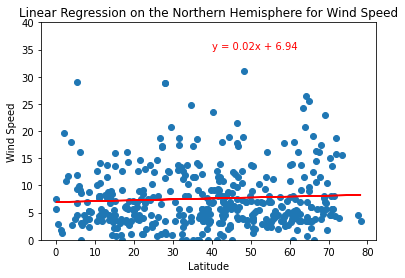

In [50]:
# Create a scatter plot of the x and y values.

plt.scatter(x_values,y_values)

# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.

plt.plot(x_values,regress_values, "r")

# Annotate the text for the line equation and add its coordinates.

plt.annotate(line_eq, (40,35), color="red")
plt.title('Linear Regression on the Northern Hemisphere for Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.ylim(0, 40)
plt.show()

In [51]:
# Create an equal number of latitudes and temperatures.

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Perform linear regression.

(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Get the equation of the line.

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_eq)
print(f"The p-value is: {p_value:.3f}")

y = -0.04x + 7.73
The p-value is: 0.239


In [52]:
# Calculate the regression line "y values" from the slope and intercept.

regress_values = [(lat * slope + intercept) for lat in x_values]

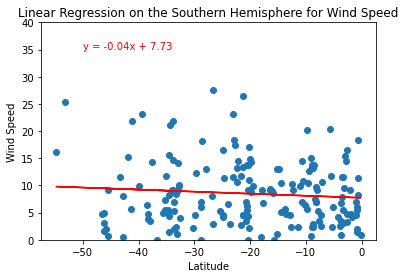

In [53]:
# Create a scatter plot of the x and y values.

plt.scatter(x_values,y_values)

# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.

plt.plot(x_values,regress_values, "r")

# Annotate the text for the line equation and add its coordinates.

plt.annotate(line_eq, (-50,35), color="red")
plt.title('Linear Regression on the Southern Hemisphere for Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.ylim(0, 40)
plt.show()